## Workshop on Practical Data Analysis in Earth and Planetary Science. 



join online https://uio.zoom.us/j/61896722660
dropbox https://www.dropbox.com/scl/fo/ouxmaiunaxjncmjvzjjjp/h?rlkey=mco9ra8fbygwax9oroglfesw0&dl=0
github https://github.com/4minakov/practical-data

### Seminar 4 - Part 2. Natural gamma ray spectroscopy from IODP core data


In this workshop, we will are going to infer concentrations of K, U, Th in a sediment core sample using natural gamma ray spectroscopy data and the least squares method


#### Least squares method

Let's start with a simple system of 3 equations and 2 unknowns. 
Geometrically, this problem is equivalent to the line (or curve) fitting

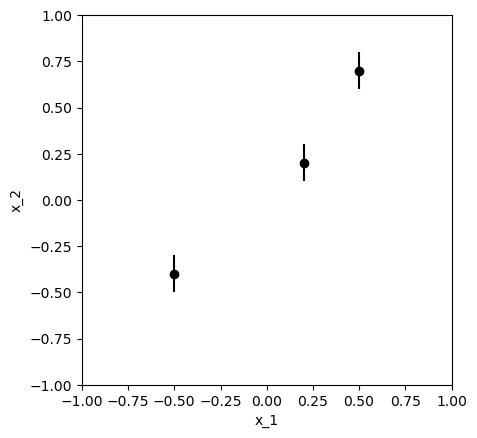

In [13]:
import matplotlib.pyplot as plt

x1 = [-0.5, 0.5, 0.2]
x2 = [-0.4, 0.7, 0.2]

x2std = 0.1 #standard error

plt.figure(1)
plt.clf()
plt.plot(x1, x2, 'ok')
plt.errorbar(x1, x2, yerr=x2std, fmt='.k')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


The solution of this system of equations provides us the relation between $x_1$ and $x_2$, in this case, a linear relation. 

\begin{equation}
\left\{
\begin{aligned}
a_1 x_1(1) + a_2 x_2(1) + a_3 &= 0 \\
a_1 x_1(2) + a_2 x_2(2) + a_3 &= 0 \\
a_1 x_1(3) + a_2 x_2(3) + a_3 &= 0
\end{aligned}
\right.
\end{equation}

The slope and intercept coefficients describung a strait line are

$c(1) = a_1/a_2 , \\
 c(2) = a_3/a_2$

Using this new variables and writing equations in matrix form

$ \begin{bmatrix}
    x_1(1) & 1  \\
    x_1(2) & 1  \\
    x_1(3) & 1  \\
\end{bmatrix} \times \begin{bmatrix}
    c_1 \\
    c_2 \\
\end{bmatrix} = \begin{bmatrix}
    x_2(1) \\
    x_2(2) \\
    x_2(3) \\
\end{bmatrix}$

We cannot solve this system exactly since we have more equations than unknowns, so that we are given with multiple conflicting evidence. The classical resolution of this problem is to search a solution with a minimum total squared error between data and predictions or minimum-norm solution. 

The squared misfit is

$F = (x_2 - A c)^T (x_2 - A c) \rightarrow min$

The minimum of $F$ with respect to $c$ is found by equating the derivative to zero

$\frac{\partial F}{\partial c} = 0 $

Taking the derivative, we find the solution

$ -2 A^{T} \left(x_2 - A c\right) = 0 \\
A^{T} x_2 - A^{T} A c = 0 \\
c = \left(A^{T}A\right)^{-1} A^{T} x_2 $



This solution is unique.



[1.05696203 0.09620253]
[[ 0.18987342 -0.01265823]
 [-0.01265823  0.03417722]]


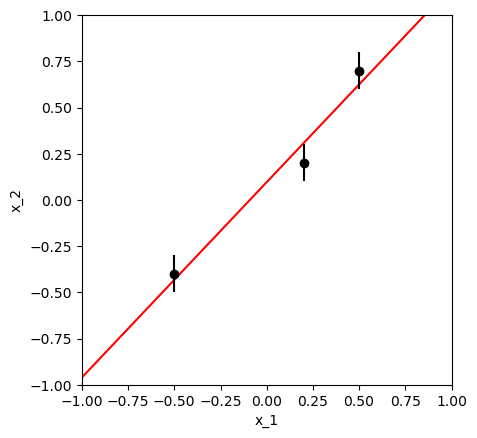

In [18]:
import numpy as np

# Create the matrix A by concatenating x1 with an array of ones
A = np.column_stack((x1, np.ones_like(x1)))
# minimum norm solution
c = np.linalg.inv(A.T @ A) @ A.T @ x2
# covariance
cv = np.linalg.inv(A.T @ A) * x2std 
print(c)
print(cv)
p1 = np.linspace(-1, 1, 10)
# Calculate xp using the linear equation
xp = p1 * c[0] + c[1]

plt.figure(2)
plt.clf()
plt.plot(p1,xp,'r')
plt.plot(x1, x2, 'ok')
plt.errorbar(x1, x2, yerr=x2std, fmt='.k')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


$\textbf{Exercise}$: 

Try to run an example for fitting a surface to a group of points which can be found  the workshop sandbox folder

We can also utilize the entire spectrum and solve a linear system of equation using least squares method:
\begin{equation}
\begin{array}{lcr} 
b_1^j &=& S_K^{1j} w_K C_K  + S_U^{1j} w_U C_U + S_{Th}^{1j} w_{Th} C_{Th} + S_{bg}^{1j} w_{bg} C_{bg} \\
b_2^j &=& S_K^{2j} w_K C_K  + S_U^{2j} w_U C_U + S_{Th}^{2j} w_{Th} C_{Th} + S_{bg}^{2j} w_{bg} C_{bg} \\
b_3^j &=& S_K^{3j} w_K C_K  + S_U^{3j} w_U C_U + S_{Th}^{3j} w_{Th} C_{Th} + S_{bg}^{3j} w_{bg} C_{bg} \\
\cdots \\
b_N^j &=& S_K^{Nj} w_K C_K  + S_U^{Nj} w_U C_U + S_{Th}^{Nj} w_{Th} C_{Th} + S_{bg}^{Nj} w_{bg} C_{bg}
\end{array}
\end{equation}

where $b$ is the total counts per second measured on the core sample at detector $j$, $S$ are standard spectra in counts per second, $N$ is the number of channels (energy windows) at each detector, e.g. $N = 1024$, $w$ are normalization coefficients.


Below is a Matlab code that illustrating the least squares method to calculate the elemental abundances in the core sample from NGR measurements   

ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d1p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d2p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d3p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d4p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d5p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d6p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d7p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151229-d8p1.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151533-d1p2.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151533-d2p2.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151533-d3p2.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151533-d4p2.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151533-d5p2.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151533-d6p2.spe
ngr_sample_323-U1341B-16H-1-W_SHLF1110331_20090730151533-d7p2.spe
ngr_sample

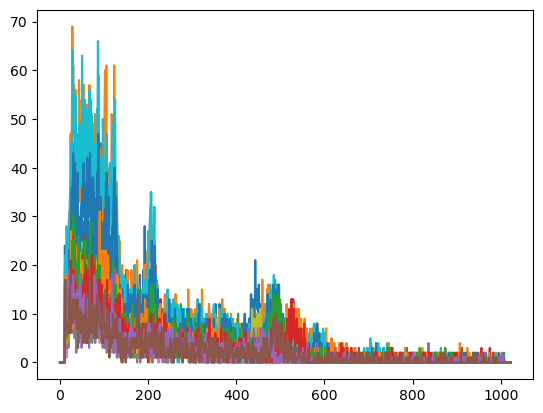

In [56]:
import os
import re
import numpy as np
import glob
import matplotlib.pyplot as plt

# Define the directory and pattern
directory = 'workshop-sandbox/ngr/U1341B-16H-1-W_SHLF1110331_2009730151613'
pattern = '*_SHLF*.spe'

# Form the full pattern and get the list of files
full_pattern = os.path.join(directory, pattern)
spe_files = glob.glob(full_pattern)

# Initialize ndata, data and data_info
ndata = 1024
data = np.zeros((ndata, len(spe_files)))
data_info = np.zeros((4, len(spe_files)))
t_data = np.zeros(len(spe_files))

# Iterate over the spe_files and extract the required information and data
for j, file_path in enumerate(spe_files):
    file = os.path.basename(file_path)  # Get only the file name without the directory
    with open(file_path, 'r') as fid:
        print(file)  # equivalent to spe_files(j).name in MATLAB
        
        # Extract information from file name using regular expression
        info = [int(x) for x in re.findall(r'\d+', file)]
        data_info[:, j] = np.array(info)[[2, 3, 6, 7]]
        
        lines = fid.readlines()
        for i, tline in enumerate(lines):
            if tline.strip().startswith('$MEAS_TIM:'):
                # Extract t_data from the next line
                tline = lines[i + 1].strip()
                t_data[j] = float(re.search(r"[-+]?\d*\.\d+|\d+", tline).group(0))
                
            elif tline.strip().startswith('$DATA:'):
                # Extract data from the following ndata lines
                for k in range(ndata):
                    tline = lines[i + k + 2].strip()
                    data[k, j] = float(tline)
                break  # Exit the loop once all data are extracted

plt.Figure, plt.plot(data)

# Create a list of calibration files in the specified directory
cal_files = glob.glob(os.path.join(directory, '*_calibration*.spe'))

# Initialize the ENER_FIT array
ener_fit = np.zeros((2, len(cal_files)))

# Iterate over the calibration files and extract the ENER_FIT values
for j, file in enumerate(cal_files):
    with open(file, 'r') as fid:
        lines = fid.readlines()
        for i, tline in enumerate(lines):
            # Search for the line starting with '$ENER_FIT:'
            if tline.strip().startswith('$ENER_FIT:'):
                # The values are on the next line
                tline = lines[i + 1].strip()
                temp = [float(val) for val in re.findall(r"[-+]?\d*\.\d+|\d+", tline)]
                ener_fit[:, j] = temp
                break  # Exit the inner loop once the values are found
print(ener_fit)


[0.56753492 1.09580529 3.4679231  0.80778034]


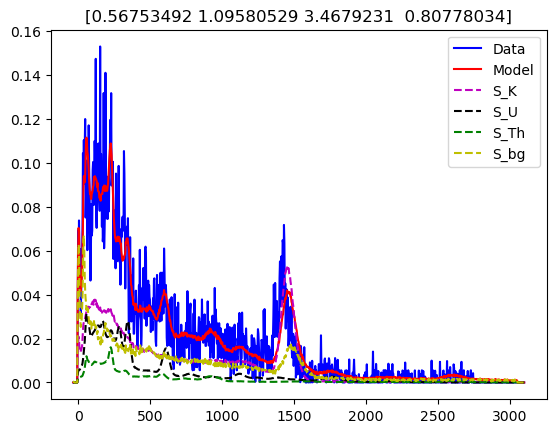

In [146]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

rho_stnd = 1300.
rho_smpl = 1200.
w = np.array([5, 100, 100, 1])
w = np.diag(1/rho_stnd/w)


ii = 3
t_data = 180  # data measurement time (s)
t_stnd = 21600  # spectra measurement time (s)

detector = np.int8(data_info[2,ii]-1);  # detector ID (0:7) Python uses zero-based indexing
ndata = 1024

S_K = np.genfromtxt(r"workshop-sandbox\ngr\S_K.csv", delimiter=',')
S_U = np.genfromtxt(r"workshop-sandbox\ngr\S_U.csv", delimiter=',')
S_Th = np.genfromtxt(r"workshop-sandbox\ngr\S_Th.csv", delimiter=',')
S_bg = np.genfromtxt(r"workshop-sandbox\ngr\S_Bg.csv", delimiter=',')
Ener = np.genfromtxt(r"workshop-sandbox\ngr\S_Ener.csv", delimiter=',')


# Calculate energy data using ENER_FIT parameters
Ener_data = ener_fit[1, detector] * np.linspace(0,ndata-1,ndata) + ener_fit[0, detector]

# Interpolate the data using linear interpolation
interp_func = interp1d(Ener_data, data[:, detector], kind='linear', fill_value=0, bounds_error=False)

# Interpolate the energy values for the specific detector
datai = interp_func(Ener[detector, :])

# make system matrix using K-U-Th standards spectra (in total counts)
A = np.column_stack((S_K[:, detector], S_U[:, detector], S_Th[:, detector], S_bg[:, detector]))
A = A @ (w*rho_smpl)  # normalize the system matrix
A = A / t_stnd  # standard spectra in counts per second
b = datai/ t_data  # data spectrum in counts per second
bvar = 10    
x = np.linalg.lstsq(A, b.T, rcond=None)[0]  # solving the linear system of equation
print(x)

# estimate covariance
H = np.linalg.inv(A.T @ A)  # Jacobian
cv = H * bvar   # covariance matrix
v = np.diag(cv)  # variance estimate
    
# calculate residuals
b1 = A @ x  # estimated spectrum
res = np.sqrt(np.mean((b1 - b) ** 2))  # Root Mean Square Residual

Ener1 = Ener[detector,:]
# Create a new figure and clear any existing plots
plt.figure(2)
plt.clf()

# Plot the data and model spectra
plt.plot(Ener1, b, 'b', label='Data')
plt.plot(Ener1, b1, 'r', label='Model')

# Calculate and plot the individual components
plt.plot(Ener1, S_K[:, detector] / t_stnd * w[0,0]*rho_stnd, '--m', label='S_K')
plt.plot(Ener1, S_U[:, detector] / t_stnd * w[1,1]*rho_stnd, '--k', label='S_U')
plt.plot(Ener1, S_Th[:, detector] / t_stnd * w[2,2]*rho_stnd, '--g', label='S_Th')
plt.plot(Ener1, S_bg[:, detector] / t_stnd * w[3,3]*rho_stnd, '--y', label='S_bg')

plt.title(str(x))
plt.legend()
plt.show()
          
        

$\textbf{Exercise}$: 

Repeat lsq calculations using the background gamma radiation data contained in the data folder (STNDNGRBACK_WRND477861_20090702002751 files).